In [1]:
#Problem Statement:
#Develop a project named "Sentiment Analysis" model classifying the restaurant reviews as +ve or -ve.

In [2]:
#Description:
#With the rapid growth of online platforms for sharing opinions and reviews.
#On the customer feedback to improve their services and attract new customers.
#Analysing the sentiment of these reviews can provide valuable insights to customer satisfaction.

In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

C:\Users\USER\AppData\Local\Temp\ipykernel_12624\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
data = pd.read_csv('Reviews.csv')

In [6]:
data 

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [7]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [11]:
#checking null values in datases
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [12]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [13]:
#checking value counts
value = data['Liked'].value_counts()
print(value)

Liked
1    500
0    500
Name: count, dtype: int64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

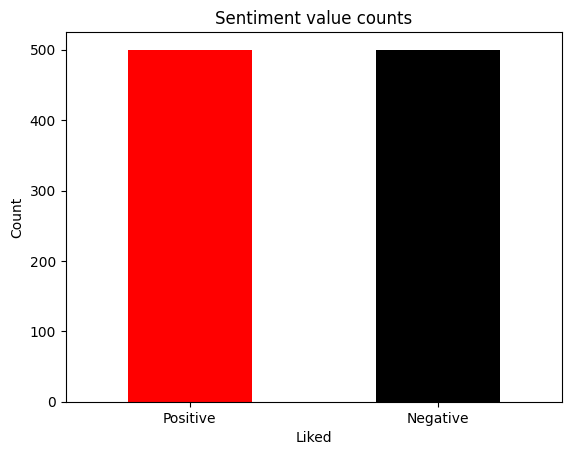

In [15]:
value.plot(kind = 'bar' , color = ['red' , 'black'])
plt.title("Sentiment value counts")
plt.xlabel('Liked')
plt.ylabel('Count')
plt.xticks(ticks=[0,1] , labels=['Positive','Negative'],rotation=0)
plt.show()

In [16]:
from wordcloud import WordCloud

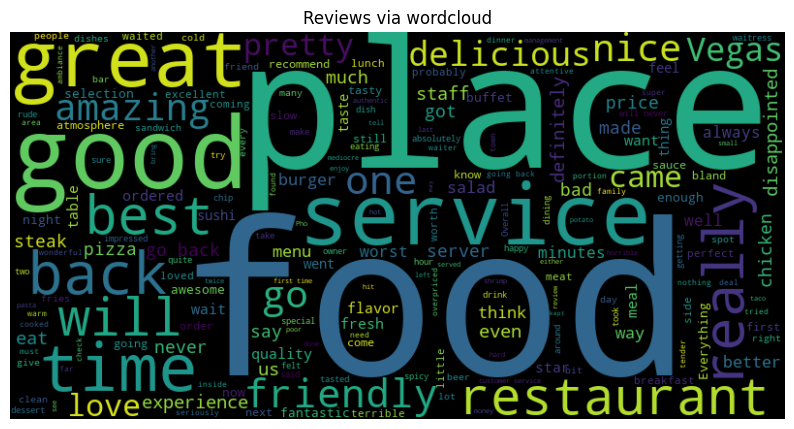

In [17]:
combined_text = " ".join(data['Review'])
wordcloud = WordCloud(width= 800 , height= 400, background_color='black').generate(combined_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Reviews via wordcloud")
plt.show()

In [18]:
from collections import Counter

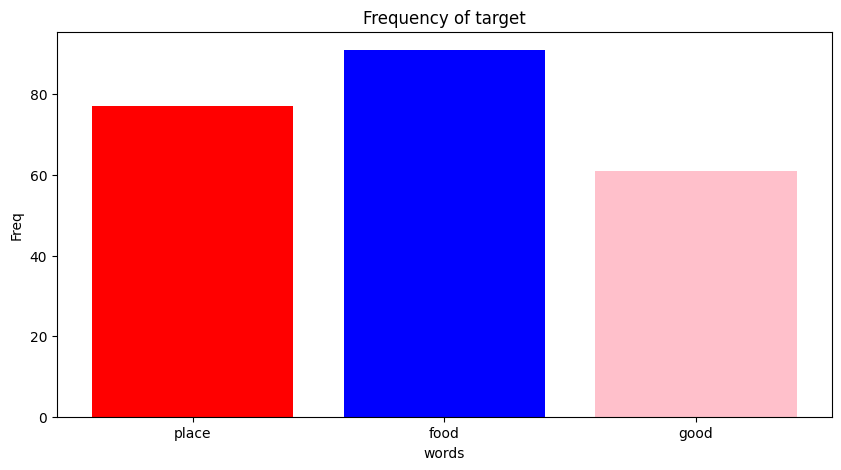

In [19]:
target = ['place','food','good']
all_words = " ".join(data['Review']).lower().split()
word_c = Counter(all_words)
target_w_c = {w:word_c[w] for w in target}
plt.figure(figsize=(10,5))
plt.bar(target_w_c.keys(),target_w_c.values(), color = ['red','blue','pink'])
plt.xlabel('words')
plt.ylabel('Freq')
plt.title("Frequency of target")
plt.show()



In [20]:
#Text preprocessing

In [21]:
#convert the dataset into lowercase
lowercased_text = data['Review'].str.lower()
print(lowercased_text)


0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [22]:
#tokenization
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
data['Tokens'] = data['Review'].apply(word_tokenize)

In [24]:
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [26]:
#Removing the punctuation
data['Review'].value_counts()

Review
#NAME?                                                                                                                                    4
The food was terrible.                                                                                                                    2
I would not recommend this place.                                                                                                         2
I love this place.                                                                                                                        2
I won't be back.                                                                                                                          2
                                                                                                                                         ..
OMG, the food was delicioso!                                                                                                              1
There is noth

In [27]:
import string

In [28]:
data['Review'] = data['Review'].str.replace(f"[{string.punctuation}]"," ",regex= True)

In [29]:
print(data['Review'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [30]:
data['Review'].value_counts()

Review
 NAME                                                                                                                                     4
I would not recommend this place                                                                                                          2
I love this place                                                                                                                         2
I won t be back                                                                                                                           2
Will not be back                                                                                                                          2
                                                                                                                                         ..
The burger    I got the  Gold Standard  a  17 burger and was kind of disappointed                                                         1
OMG  the food

In [31]:
#Removing stop words
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
stop_words = set(stopwords.words('english'))

In [33]:
data['Tokens'] = data['Review'].apply(lambda x:[word for word in word_tokenize(x) if word not in stop_words])

In [34]:
print(data['Tokens'])

0                                    [Wow, Loved, place]
1                                          [Crust, good]
2                           [Not, tasty, texture, nasty]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4                  [The, selection, menu, great, prices]
                             ...                        
995           [I, think, food, flavor, texture, lacking]
996                          [Appetite, instantly, gone]
997             [Overall, I, impressed, would, go, back]
998    [The, whole, experience, underwhelming, I, thi...
999    [Then, I, wasted, enough, life, poured, salt, ...
Name: Tokens, Length: 1000, dtype: object


In [35]:
#stemming
#stemming is a process of reducing the word into root or base word form by removing suffix

In [36]:
from nltk.stem import PorterStemmer


In [37]:
stemmer = PorterStemmer()

In [38]:
data['stemmed'] = data['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

In [39]:
print(data['stemmed'])

0                                     wow love thi place
1                                      crust is not good
2                 not tasti and the textur wa just nasti
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                               appetit instantli gone
997        overal i wa not impress and would not go back
998    the whole experi wa underwhelm and i think we ...
999    then as if i hadn t wast enough of my life the...
Name: stemmed, Length: 1000, dtype: object


In [40]:
#Lemmatization
#Lemmatization is the process transforming a word into its base or dictionary form

In [41]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [43]:
lemmatizer = WordNetLemmatizer()

In [44]:
data['Lemmatized'] = data['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word ,pos = wordnet.VERB) for word in word_tokenize(x)]))

In [45]:
print(data['Lemmatized'])

0                                   Wow Loved this place
1                                      Crust be not good
2                Not tasty and the texture be just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                                Appetite instantly go
997       Overall I be not impress and would not go back
998    The whole experience be underwhelming and I th...
999    Then as if I hadn t waste enough of my life th...
Name: Lemmatized, Length: 1000, dtype: object


In [46]:
#Removing numbers from reviews
import re
data['no_num'] = data['Review'].apply(lambda x: re.sub(r'\d+',' ',x))

In [47]:
print(data['no_num'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: no_num, Length: 1000, dtype: object


In [48]:
#removing special characters
data['cleaned'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]','',x))

In [49]:
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [50]:
#expanding method
import contractions
data['Expand'] = data['Review'].apply(contractions.fix)

In [51]:
print(data['Expand'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Expand, Length: 1000, dtype: object


In [52]:
#removing emojis
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import emoji
data['emoji'] = data['Review'].apply(emoji.demojize)

In [54]:
print(data['emoji'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: emoji, Length: 1000, dtype: object


In [55]:
#removing links from review text
!pip install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
from bs4 import BeautifulSoup
data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text()) 

In [57]:
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)  # Reduced features for speed
X = vectorizer.fit_transform(data['cleaned'])
y = data['Liked']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)



MultinomialNB()

In [59]:
# Evaluate the model
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))






✅ Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [62]:
import joblib

# Load saved model and vectorizer
model = joblib.load('sentiment_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Prediction function
def predict_sentiment(text):
    transformed_text = vectorizer.transform([text])
    prediction = model.predict(transformed_text)
    return "Positive" if prediction[0] == 1 else "Negative"

# Read input properly
try:
    user_input = input("Enter a review: ").strip()  # Ensure input is taken
    if user_input == "":
        print("⚠️ No input provided. Please enter a valid review.")
    else:
        print("🔍 Sentiment:", predict_sentiment(user_input))
except Exception as e:
    print(f"❌ Error reading input: {e}")


🔍 Sentiment: Positive


In [61]:
print(predict_sentiment("Found hair"))

Negative
